# Generate Cosmic Muon Flux

The analytical cosmic ray spectrum is based on [Phys. Atom. Nuclei 69, 1293–1298 (2006)](https://link.springer.com/article/10.1134/S1063778806080047).
The analytical form considers cosmic rays from 1 GeV/c to $10^5$ GeV/c.

Eq (1) in this paper is in unit of /($cm^2\cdot s\cdot sr$).  If integrating p from 1 to 1e5 GeV/c, at $\theta$ =0, we get 0.0076 muons from Eq (1), corresponding to 76 muons/($m^2\cdot s\cdot sr$), which matches the text describing the vertical flux.

Finally ready to generate the cosmic muon flux according to this formula!  Use momentum, $\cos\theta$ (not $\theta$) as the variable

In [1]:
# for creating a responsive plot
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
import scipy.integrate as integrate

In [2]:
rng = np.random.default_rng()

In [3]:
# Analytical cosmic ray flux from the paper
def dI_dpdcosth(costh, p):
    return 18/(p*costh+145)* (1./np.power(p+2.7/costh, 2.7))* (p+5)/(p+5/costh)

In [4]:
def getNSamples(xmin, xmax, N):
    return rng.uniform(xmin, xmax, N)

In [5]:
def isAccepted(n, vPDF, maxPDF):
    return rng.uniform(0., maxPDF, n) < vPDF

In [6]:
def rejectSampling(pmin, pmax, costhmin, costhmax, nSamples):
    outSamples = np.array([ (p, costh) for p, costh in 
                           zip(getNSamples(pmin, pmax, nSamples), getNSamples(costhmin, costhmax, nSamples)) ])
    outPDF = dI_dpdcosth(outSamples[:,1], outSamples[:,0])
    maxPDF = dI_dpdcosth(costhmax, pmin)

    mask = isAccepted(len(outSamples), outPDF, maxPDF)
    reject, = np.where(~mask)

    while reject.size > 0:
        fill = np.array([ (p, costh) for p, costh in
                        zip(getNSamples(pmin, pmax, reject.size), getNSamples(costhmin, costhmax, reject.size)) ])
        
        fillPDF = dI_dpdcosth(fill[:,1], fill[:,0])
        mask = isAccepted(len(fill), fillPDF, maxPDF)
        outSamples[reject[mask]] = fill[mask]
        reject = reject[~mask]

    return outSamples

In [7]:
voutSamples = rejectSampling(1., 2., 0.5, 1., 100000)
len(voutSamples)

100000

In [8]:
outHist = np.histogram2d(voutSamples[:,0], voutSamples[:,1], bins = [20, 10], range = [[1., 2.], [0.5, 1]])
voutSamples[:,0], outHist

(array([1.41223278, 1.88566729, 1.0158335 , ..., 1.05281415, 1.29218643,
        1.5487248 ]),
 (array([[ 207.,  236.,  331.,  418.,  522.,  675.,  783.,  874., 1097.,
          1344.],
         [ 202.,  272.,  332.,  402.,  551.,  635.,  745.,  892., 1070.,
          1170.],
         [ 179.,  254.,  347.,  416.,  517.,  580.,  702.,  854.,  998.,
          1180.],
         [ 212.,  249.,  327.,  414.,  523.,  584.,  737.,  826.,  993.,
          1166.],
         [ 202.,  240.,  302.,  361.,  469.,  549.,  668.,  803.,  971.,
          1071.],
         [ 183.,  243.,  336.,  373.,  483.,  547.,  638.,  829.,  876.,
          1028.],
         [ 167.,  243.,  289.,  400.,  463.,  522.,  654.,  771.,  950.,
          1032.],
         [ 173.,  224.,  290.,  366.,  426.,  540.,  654.,  733.,  847.,
           934.],
         [ 158.,  221.,  307.,  387.,  446.,  543.,  598.,  725.,  862.,
           903.],
         [ 174.,  222.,  281.,  349.,  486.,  513.,  568.,  727.,  826.,
           94

In [9]:
costh, p = np.meshgrid(outHist[2][0:-1], outHist[1][0:-1])
costh

array([[0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95],
       [0.5 , 0.55, 0.6 , 0.65, 0.

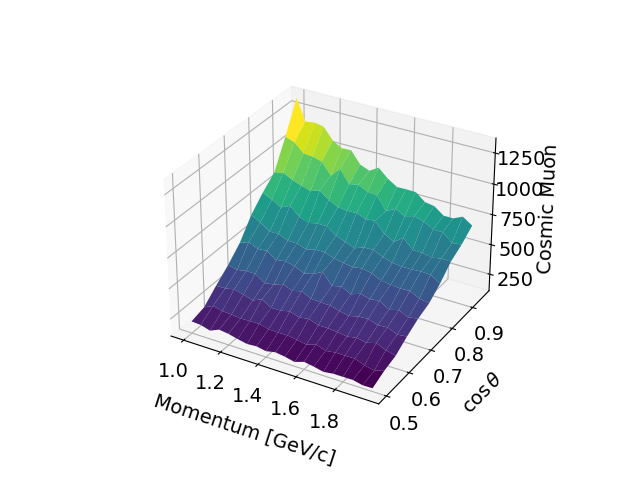

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
ax.plot_surface( p, costh, outHist[0], cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 14, labelpad = 10 )
ax.set_zlabel( r'Cosmic Muon', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

# ax.set_xlim( [1, 2])

## Validation

Compare with the analytic form

In [12]:
# Find the center point of each bin 
cosRefBin = np.arange(0.525, 1.025, 0.05)
pRefBin = np.arange(1.025, 2.025, 0.05)
cosRef, pRef = np.meshgrid(cosRefBin, pRefBin)
# cosRef, pRef
# dI_dpdcosth(cosRef, pRef)
cosRef.size, len(pRef)

(200, 20)

In [13]:
# Normalization
norm = integrate.dblquad(dI_dpdcosth, 1., 2., 0.5, 1.)
f = outHist[0].sum()*1*0.5/norm[0]/(20*10)
f, outHist[0].sum(), norm[0]

(380314.3935972201, 100000.0, 0.0006573508765612687)

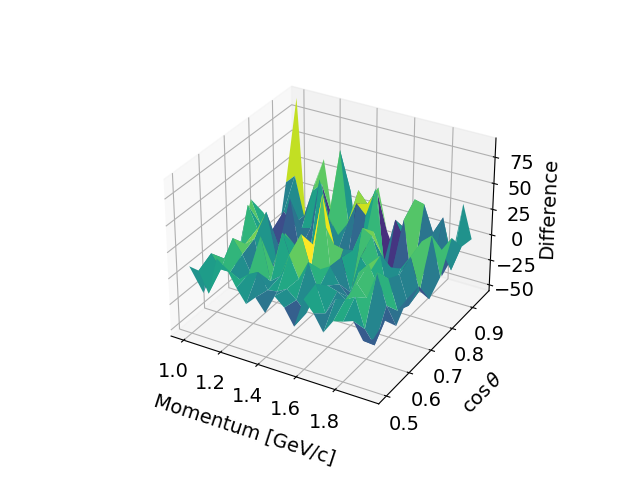

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

diff = outHist[0] - dI_dpdcosth(cosRef, pRef)*f
ax.plot_surface( p, costh, diff, cmap = 'viridis')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 14, labelpad = 10 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 14, labelpad = 10 )
ax.set_zlabel( r'Difference', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'z', labelsize = 14)

# ax.set_xlim( [1, 2])

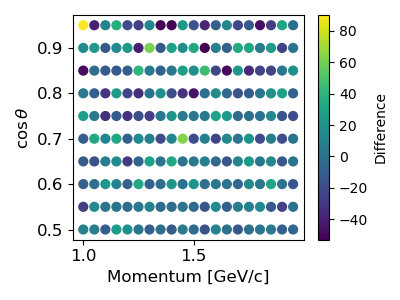

In [15]:
fig, ax = plt.subplots( figsize = (4, 3), layout = 'tight' )

sc = ax.scatter( p, costh, c = diff, marker = 'o', s = 40, cmap = 'viridis')
fig.colorbar(sc, ax = ax, label = r'Difference')

ax.set_xlabel( 'Momentum [GeV/c]', fontsize = 12 )
ax.set_ylabel( r'$\cos\theta$', fontsize = 12 )
# ax.set_zlabel( r'Difference', fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

In [18]:
I = integrate.dblquad(dI_dpdcosth, 1., 10., 0., 1.)
I[0]*2*np.pi

0.01349223362627387